## Weak Scaling and Gustavson's Law

Weak scaling measures how the solution time varies with the number of processors for a fixed problem size per processor.
  * Problem size gets bigger as we add resources
  * Use parallel resources to solve bigger problems 
    * hopefully in same amount of time.  same amount of time is ideal scaling

### Turbulence as a Example

Our understanding of fluids is limited by the resolution at which we can solve the physics equations.
Incredibly important set of problems:
  * Windmill farm efficiency
  * Aerodynamics and lift
  * Safety of structures
  
Parallel computing has increased the resolution of solutions from $1024^3$ to $16384^3$ in less than two decades.

Many important turbulent features at small scale.

https://youtu.be/y0AsKGhx-Ug

### Gustavson's Law

A variant of Amdahl's law for varying problem sizes

$ S_{latency}(s) = 1 - p + sp $

* _p_ is the optimized portion
* _s_ is the number of cores

Captures concept that as resources increase, we can solve bigger problems on more hardware.

Scaleup is less sensitive to Amdahl number than is speedup.
  * Why?? (poll)

<AxesSubplot:>

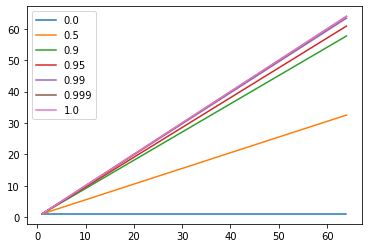

In [6]:
%matplotlib inline

from itertools import product
import numpy as np
import pandas as pd

resources = range(1,65)
p = [0,.5,.9,.95,.99,.999, 1.0]

data_arr = np.empty((len(resources), len(p)))
        
# initiliaze array using numpy indexing
for i,j in np.ndindex(data_arr.shape):
    data_arr[i,j] = 1 -p[j] + p[j]*resources[i]  
    
df = pd.DataFrame(data=data_arr, index=resources, columns=p)
df.plot()

### Comments on Weak Scaling

* Bigger problems = bigger science
  * Dominant trend in HPC over last 25 years
* Weak scaling coming to an end
  * Processor growth is far outstripping memory growth
  * Weak scaling can’t continue
* Weak scaling more robust measurement (often)
  * Strong scaling hits a wall as reduced total time magnifies fixed startup costs
* Weak scaling difficult to express for algorithms
  * Scaling happens in total work, e.g. $O(n \log n)$, not in the input size
  * Problem size != input size
  
  
In this class
* Efficiency = efficiency chart (relative to 1.0)
  * Speedup is a speedup chart (relative to linear speedup)
  * Scaleup is a scaleup chart (relative to linear scaleup)
* Express your scaling model
  * Weak (variable problem size)
  * Strong (fixed problem size)
* Try not to mix weak and strong scaling

### Learning Outcomes

1. Weak scaling of the problem size not the input size.
2. Weak scaling not as senstive to parallel loss, because the startup costs do not get magnified.